In [480]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer#, NewtonOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [481]:
import torch

# Abstract

# Part A: Implement Logistic Regression

Here is a link to my [logistic.py](https://github.com/opfleet/opfleet.github.io/blob/main/posts/LogisticPost/logistic.py) file, which contains my implementation of the logistic regression model that I use throughout this blog post.

# Part B: Experiments

In [484]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

#X, y = classification_data(noise = 0.5)

### Experiment 1

**Vanilla gradient descent**: When $p_{dim} = 2$, $\alpha$ is sufficiently small, and $\beta = 0$, gradient descent for logistic regression converges to a weight vector **w** that looks visually correct. Furthermore, the loss decreases monotonically.

In [485]:
torch.manual_seed(123)
X, y = classification_data(n_points= 500, noise= 0.5, p_dims= 2)

LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

loss_vec = []
for _ in range(100):
    local_loss = LR.loss(X, y).item()
    opt.step(X, y, alpha= 0.1, beta= 0.0)
    
    loss_vec.append(local_loss)

print(loss_vec)

[0.5663606524467468, 0.5599420070648193, 0.5537047982215881, 0.5476439595222473, 0.5417548418045044, 0.5360325574874878, 0.5304723978042603, 0.5250697135925293, 0.5198197960853577, 0.5147179961204529, 0.5097599625587463, 0.5049411654472351, 0.5002572536468506, 0.49570396542549133, 0.4912770986557007, 0.4869726002216339, 0.4827864468097687, 0.4787147343158722, 0.4747536778450012, 0.4708996117115021, 0.4671488404273987, 0.46349790692329407, 0.45994341373443604, 0.4564821124076843, 0.4531107544898987, 0.4498262405395508, 0.44662556052207947, 0.44350579380989075, 0.44046422839164734, 0.4374981224536896, 0.43460479378700256, 0.4317817687988281, 0.42902660369873047, 0.42633694410324097, 0.42371055483818054, 0.4211452007293701, 0.41863882541656494, 0.41618937253952026, 0.41379493474960327, 0.41145360469818115, 0.4091636538505554, 0.4069232642650604, 0.40473082661628723, 0.40258467197418213, 0.4004833400249481, 0.39842531085014343, 0.39640918374061584, 0.3944335877895355, 0.3924972116947174, 0

In [486]:
def isMonoDecrease(v):
    dec = []
    dec.extend(v)
    dec.sort(reverse = True)
    if (v == dec):
        return True
    return False

In [487]:
from matplotlib import pyplot as plt

def plot_data(X, y, ax):
    assert X.shape[1] == 3 # when p_dim == 2
    markers = ['o', '^']
    targets = [0, 1]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 40,  c = y[ix]*2-1, facecolors = "none", edgecolors = "darkgrey", cmap = 'seismic', vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 100)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x,y,**kwargs)

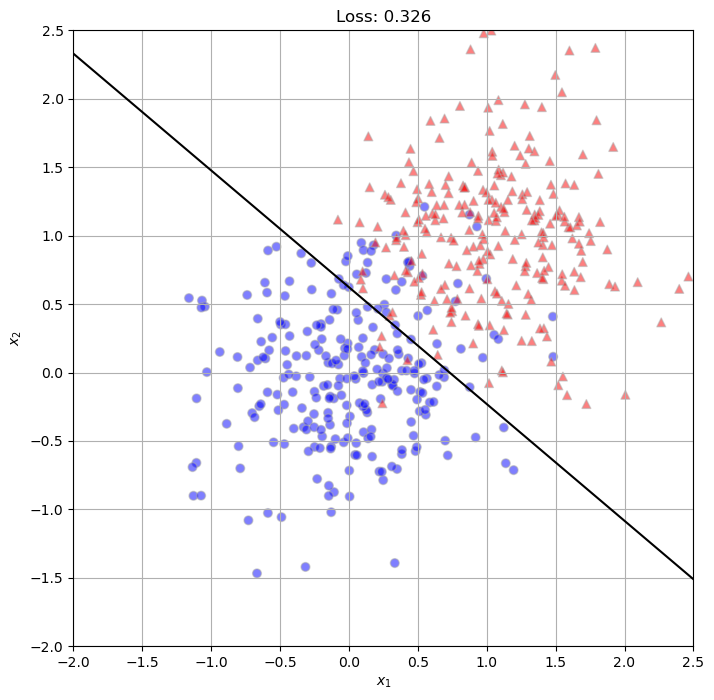

In [488]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.set_xlim([-2, 2.5])
ax.set_ylim([-2, 2.5])

last_loss = loss_vec[len(loss_vec)-1]
ax.set_title(f'Loss: {last_loss:.3f}')
ax.grid(True)

plot_data(X, y, ax)
draw_line(torch.clone(LR.w), -2, 2.5, ax, color= 'black')

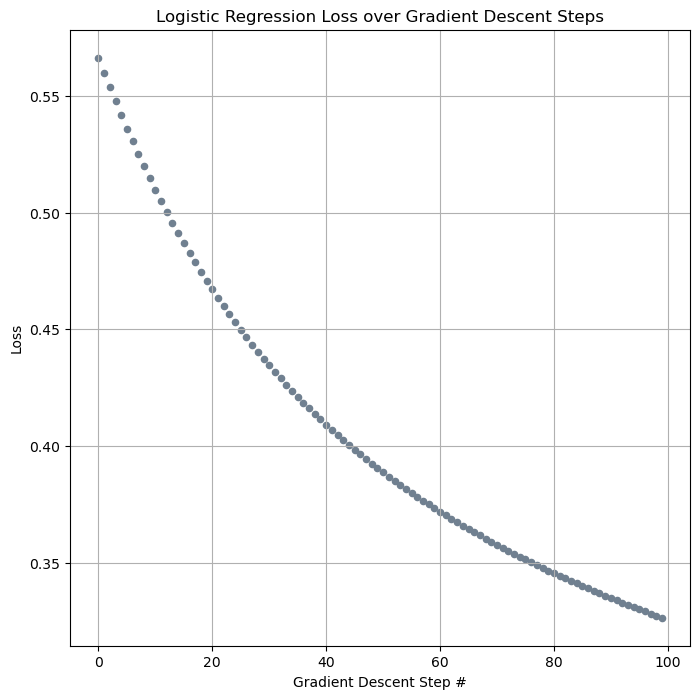

In [489]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.grid(True)
ax.scatter(torch.arange(len(loss_vec)), loss_vec, s = 20, color = "slategrey")
labs = ax.set(xlabel = "Gradient Descent Step #", ylabel = "Loss", title = "Logistic Regression Loss over Gradient Descent Steps")

In [490]:
isMonoDecrease(loss_vec)

True

### Experiment 2
**Benefits of momentum**: On the same data, gradient descent with momentum (e.g. $\beta = 0.9$) can converge to the correct weight vector in fewer iterations than vanilla gradient descent (with $\beta = 0$). Plot the loss over iterations for each method. Experiment with the data and choice of $\alpha$ in order to observe speedups due to momentum.

In [491]:
LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

loss_dict = {}
for i in range(1, 10):
    LR = LogisticRegression()
    opt = GradientDescentOptimizer(LR)
    loss_dict[i] = []
    for _ in range(100):
        local_loss = LR.loss(X, y).item()
        opt.step(X, y, alpha= i/10, beta= 0.9)
        
        loss_dict[i].append(local_loss)

print(loss_dict)

{1: [0.6792325973510742, 0.9806838631629944, 1.2897882461547852, 1.56386137008667, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 2: [0.4981890916824341, 0.48889169096946716, 0.5221630334854126, 0.5563738346099854, 0.5809907913208008, 0.5939515233039856, 0.5958430767059326, 0.5881557464599609, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.19705863296985626, 0.19679629802703857, 0.19738587737083435, 0.1985524296760559, 0.200041264295578, 0.2016284167766571, 0.20312851667404175, 0.20439940690994263, 0.20534

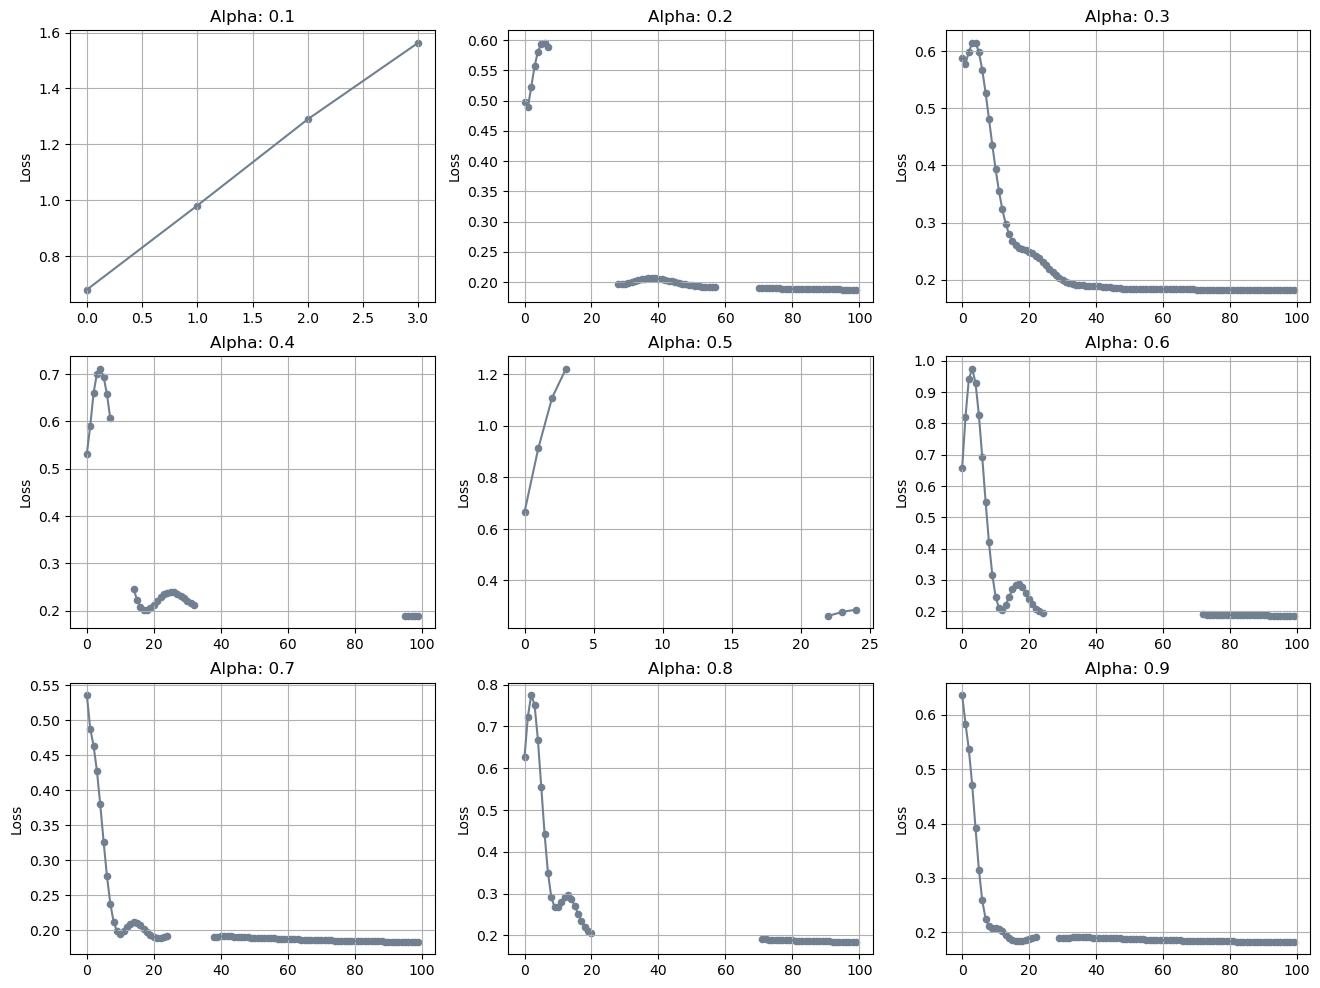

In [499]:
fig, axs = plt.subplots(3, 3, figsize = (16, 12))

for i in range(3):
    for j in range(3):
        axs[i, j].grid(True)
        axs[i, j].plot(loss_dict[i*3+j+1], color = "slategrey")
        axs[i, j].scatter(torch.arange(len(loss_dict[i*3+j+1])), loss_dict[i*3+j+1], s = 20, color = "slategrey")
        labs = axs[i, j].set(ylabel = "Loss", title = f"Alpha: {(i*3+j+1)/10:.1f}")

### Experiment 3
**Overfitting**: Generate some data where $p_{dim} > n_{points}$. Do this twice with the exact same parameters. Call the first dataset $X\_train$, $y\_train$ and the second dataset $X\_test$, $y\_test$. Then, do an experiment in which you fit a logistic regression model to the data $X\_train$, $y\_train$ and obtain 100% accuracy on this training data. What is the accuracy of the test data?

In [497]:
torch.manual_seed(1)

X_train, y_train = classification_data(n_points= 5, noise= 0.5, p_dims= 10)
X_test, y_test = classification_data(n_points= 5, noise= 0.5, p_dims= 10)

X_train = X_train.type(torch.FloatTensor)
y_train = y_train.type(torch.FloatTensor)
X_test = X_test.type(torch.FloatTensor)
y_test = y_test.type(torch.FloatTensor)


LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

loss_vec = []
loss = 1.0

# very hard to get loss to perfectly = 0.0,
# therefore, I thought that rounding to 0.0% 
# would be sufficient.
while loss > 0.0001:
    local_loss = LR.loss(X_train, y_train).item()
    opt.step(X_train, y_train, alpha= 0.1, beta= 0.3)
    
    loss_vec.append(local_loss)
    loss = local_loss

print(f'Loss on train data: {loss_vec[len(loss_vec)-1]*100:.2f}%') #use accuracy_model to test accuracy, rn I'm producting the loss

Loss on train data: 0.01%


In [498]:
print(f'Loss on test data: {LR.loss(X_test, y_test)*100:.2f}%')

Loss on test data: 3.77%


# Part C: Writing

# Conclusion